In [1]:
#Esto es un cuaderno, para realizar el proyecto paso a paso

Importamos librerias necesarias en la limpieza de datos (no olvidar instalar las libreras necesarias con pip install .. antes de importarlas)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OrdinalEncoder

import folium
import plotly.express as px


Leemos el primer csv, y lo asignamos como nuestro dataframe. Imprimimos las primeras lineas para tener una idea del dataframe

In [3]:
df_ca=pd.read_csv("commercial_activity_df.csv")
print(df_ca.head())

   Unnamed: 0   pk_cid pk_partition  entry_date entry_channel  \
0           0  1375586   2018-01-28  2018-01-12           KHL   
1           1  1050611   2018-01-28  2015-08-10           KHE   
2           2  1050612   2018-01-28  2015-08-10           KHE   
3           3  1050613   2018-01-28  2015-08-10           KHD   
4           4  1050614   2018-01-28  2015-08-10           KHE   

   active_customer             segment  
0              1.0   02 - PARTICULARES  
1              0.0  03 - UNIVERSITARIO  
2              0.0  03 - UNIVERSITARIO  
3              0.0  03 - UNIVERSITARIO  
4              1.0  03 - UNIVERSITARIO  


Obtenemos informacion general del dataframe con  los metodos .describe() e .info()

In [4]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   pk_cid           int64  
 2   pk_partition     object 
 3   entry_date       object 
 4   entry_channel    object 
 5   active_customer  float64
 6   segment          object 
dtypes: float64(1), int64(2), object(4)
memory usage: 318.5+ MB


Vemos que existe una columna de numeros, que coincide con el numero de los registros, pero que no es el indice, llamada Unnamed. Vamos a cambiar el nombre a esta columna y asignarla como indice.

In [5]:
n_index = 'Index'
df_ca = df_ca.rename_axis(n_index).reset_index()

In [6]:
df_ca.set_index('Index', inplace=True)

Comprobamos que el indice ahora es correcto, pero nos sobra la columna Unnamed, la borramos con del

In [7]:
print(df_ca.head())

       Unnamed: 0   pk_cid pk_partition  entry_date entry_channel  \
Index                                                               
0               0  1375586   2018-01-28  2018-01-12           KHL   
1               1  1050611   2018-01-28  2015-08-10           KHE   
2               2  1050612   2018-01-28  2015-08-10           KHE   
3               3  1050613   2018-01-28  2015-08-10           KHD   
4               4  1050614   2018-01-28  2015-08-10           KHE   

       active_customer             segment  
Index                                       
0                  1.0   02 - PARTICULARES  
1                  0.0  03 - UNIVERSITARIO  
2                  0.0  03 - UNIVERSITARIO  
3                  0.0  03 - UNIVERSITARIO  
4                  1.0  03 - UNIVERSITARIO  


In [8]:
del(df_ca["Unnamed: 0"])

In [9]:
print(df_ca.head())

        pk_cid pk_partition  entry_date entry_channel  active_customer  \
Index                                                                    
0      1375586   2018-01-28  2018-01-12           KHL              1.0   
1      1050611   2018-01-28  2015-08-10           KHE              0.0   
2      1050612   2018-01-28  2015-08-10           KHE              0.0   
3      1050613   2018-01-28  2015-08-10           KHD              0.0   
4      1050614   2018-01-28  2015-08-10           KHE              1.0   

                  segment  
Index                      
0       02 - PARTICULARES  
1      03 - UNIVERSITARIO  
2      03 - UNIVERSITARIO  
3      03 - UNIVERSITARIO  
4      03 - UNIVERSITARIO  


Tambien cambiaremos las columnas "pk_partition" y "entry_date" a formato fecha

In [10]:
for i in ["pk_partition","entry_date"]:
    df_ca[i]=pd.to_datetime(df_ca[i],format='%Y-%m-%d',errors="coerce")


### CONSULTAR PORQUE ESTO ME METE NULOS, CUANDO NO LOS HABIA"


Aparece un error al cambiar el formato de las fechas, vamos a tratarlo y volveremos a ejecutarlo


In [11]:
df_ca.loc[688]

pk_cid                         1051705
pk_partition       2018-01-28 00:00:00
entry_date         2015-08-14 00:00:00
entry_channel                      KHD
active_customer                    0.0
segment             03 - UNIVERSITARIO
Name: 688, dtype: object

In [12]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 318.5+ MB


Comenzamos ahora la busqueda de nulos


In [13]:
df_ca.isnull().any()

pk_cid             False
pk_partition       False
entry_date          True
entry_channel       True
active_customer    False
segment             True
dtype: bool

In [14]:
df_ca["entry_date"].isna().sum()

6413

In [15]:
df_ca.dropna(subset = ["entry_date"], inplace=True)

Existen dos columnas con nulos, vamos a ver cuantos son

In [16]:
df_ca.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      132083
active_customer         0
segment            133009
dtype: int64

In [17]:
df_ca.head(10)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
Index,,,,,,
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO
5,1050615,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
6,1050616,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
7,1050617,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO
8,1050619,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO


Ahora contaremos los posibles duplicados que haya, si los hay

In [18]:
df_ca[df_ca.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pk_cid           0 non-null      int64         
 1   pk_partition     0 non-null      datetime64[ns]
 2   entry_date       0 non-null      datetime64[ns]
 3   entry_channel    0 non-null      object        
 4   active_customer  0 non-null      float64       
 5   segment          0 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 0.0+ bytes


Ahora echaremos un vistazo al dataframe con un histrograma

array([[<Axes: title={'center': 'pk_cid'}>,
        <Axes: title={'center': 'pk_partition'}>],
       [<Axes: title={'center': 'entry_date'}>,
        <Axes: title={'center': 'active_customer'}>]], dtype=object)

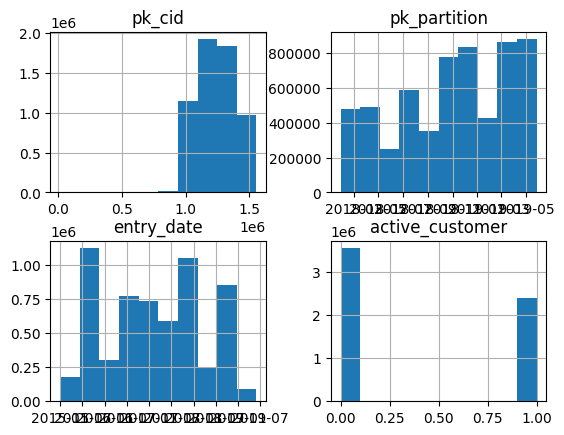

In [19]:
df_ca.hist()

Vemos la distribucion de entry channel, y eliminaremos todas las filas que contengan un valor de "entry_channel" inferior al 1% del total de registros del dataset (aprox 6M -> 0.1 % -> 6k)

In [20]:
df_ca["entry_channel"].value_counts()

entry_channel
KHE    3113947
KFC     889944
KHQ     590280
KAT     415870
KHK     230182
        ...   
KES         11
KEJ          8
KHS          5
KDA          2
KFP          2
Name: count, Length: 67, dtype: int64

In [21]:
def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []  
  tabla=dataset[columna].value_counts().reset_index()
  print(tabla)
  for i in range(0,len(tabla)):
    if (tabla.iloc[i]["count"]) < umbral:
      lista_borrar.append(tabla.iloc[i][columna])
  return lista_borrar


In [22]:
#Esta función nos permite eliminar valores con pocos registros, ya que son menos representativos. El umbral elegido de 6000 es aprox el 1% de los registros totales. Esto quiere decir que si en esta columna, hay un valor que se repita menos de 6000 veces, será eliminado

In [23]:
lista_eliminar_entry = obten_lista_eliminar(df_ca, "entry_channel", 6000)


   entry_channel    count
0            KHE  3113947
1            KFC   889944
2            KHQ   590280
3            KAT   415870
4            KHK   230182
..           ...      ...
62           KES       11
63           KEJ        8
64           KHS        5
65           KDA        2
66           KFP        2

[67 rows x 2 columns]


In [24]:
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)




In [25]:
eliminar_lista_df(df_ca,"entry_channel",lista_eliminar_entry)

In [26]:
df_ca["entry_channel"].value_counts()

entry_channel
KHE    3113947
KFC     889944
KHQ     590280
KAT     415870
KHK     230182
KHM     173527
KHN     107919
KFA      78910
KHD      75130
RED      60560
KHL      41736
KHF      20657
KHO       8238
Name: count, dtype: int64

In [27]:
#Exploramos ahora la otra columna con nulos, "segment"

df_ca["segment"].value_counts()

segment
03 - UNIVERSITARIO    3896244
02 - PARTICULARES     1813143
01 - TOP                96673
Name: count, dtype: int64

In [28]:
#Vemos que universitario es el valor más repetido, y podriamos imputar los nulos como universitarios, ya que los 132k de nulos no representan una gran diferencia, pero esto podría suponer "falsear" los datos.
#Sería una buena aproximación inicial, pero HAY QUE REFINARLO EN PROXIMOS PASOS

df_ca['segment'].fillna(df_ca['segment'].mode().iloc[0],inplace = True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21856\1937004378.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ca['segment'].fillna(df_ca['segment'].mode().iloc[0],inplace = True)


In [29]:
#Comprobamos que no queden nulos
df_ca[df_ca["segment"].isnull()]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
Index,,,,,,


In [30]:
#Vamos a tratar ahora los nulos de la columna "entry_channel"

df_ca.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      132083
active_customer         0
segment                 0
dtype: int64

In [31]:
#Dado que son muchos nulos y los valores posibles muy distintos, imputar una moda puede inducir errores. Para ello, seleccionaremos para cada "segment", su moda de "entry_channel". Hecho esto, imputaremos dicha moda a los nulos en funcion de su "segment"

###                                                                     ###
###     ESTA SECCIÓN ES NECESARIO OPTIMIZARLA, SON DEMASIADOS PASOS     ###
###                Y TARDA DEMASIADO                                    ###
###                                                                     ###

# Calculamos la moda en función de "segment" y "entry_channel"
moda_por_segment_entry_channel = df_ca.groupby(["segment", "entry_channel"]).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Seleccionamos las modas por "segment"
moda_por_segment_entry_channel = moda_por_segment_entry_channel.groupby('segment')['entry_channel'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index(name='entry_channel_moda')

# Unimos la moda con el DataFrame original en función de "segment"
df_ca_moda_entry_channel = pd.merge(df_ca, moda_por_segment_entry_channel, on='segment', how='left')

# Rellenamos los valores nulos en "entry_channel" con la moda correspondiente
df_ca_moda_entry_channel['entry_channel'] = df_ca_moda_entry_channel.apply(lambda row: row['entry_channel_moda'] if pd.isnull(row['entry_channel']) else row['entry_channel'], axis=1)

# Eliminamos la columna auxiliar de la moda
df_ca = df_ca_moda_entry_channel.drop(['entry_channel_moda'], axis=1)


In [32]:
#Ahora que no quedan nulos, revisaremos el resto de columnas
df_ca.isnull().sum()

pk_cid             0
pk_partition       0
entry_date         0
entry_channel      0
active_customer    0
segment            0
dtype: int64

In [33]:
#Columna pk_cid
df_ca["pk_cid"].value_counts()

pk_cid
1375586    17
1328833    17
1328837    17
1328839    17
1328840    17
           ..
1473681     1
1473585     1
1537955     1
1473289     1
1550586     1
Name: count, Length: 453784, dtype: int64

In [34]:
df_ca["pk_cid"].value_counts().mean()

13.087687093418895

In [35]:
df_ca.duplicated().value_counts()

False    5938983
Name: count, dtype: int64

In [36]:
#Como vimos al inicio, no hay registros duplicados, pero sin embargo en la columna pk_cid (identificador de cliente), hay cliente que aparecen hasta 17 veces en los registros
#Esto parece indicar que un mismo cliente puede contratar varios servicios en distintas fechas, lo cual es lógico, pero sería interesante tenerlo en cuenta, ya que puede indicar la predisposicion del cliente a contratar mas productos
#Vamos a crear una columna nueva, llamada "cliente_habitual" que indicará con un 1 si el cliente ha contratado más que la media y con un 0 si ha contratado menos que la media

#REVISAR#!!

##TAMBIEN PODRIA SER LA MEDIA DE LA ANTIGÜEDAD DE LOS CLIENTES ##!!

df_ca['cliente_habitual'] = (df_ca.groupby('pk_cid')['pk_cid']
                             .transform('count') > df_ca["pk_cid"].value_counts().mean()).astype(int)



In [37]:
df_ca["cliente_habitual"].value_counts()

cliente_habitual
1    4130893
0    1808090
Name: count, dtype: int64

In [38]:
#Columna pk_partition
df_ca["pk_partition"].value_counts()

pk_partition
2019-05-28    440469
2019-04-28    437081
2019-03-28    433565
2019-02-28    429635
2019-01-28    425590
2018-12-28    421191
2018-11-28    415109
2018-10-28    401047
2018-09-28    374104
2018-08-28    351719
2018-07-28    338155
2018-06-28    251195
2018-05-28    249019
2018-04-28    246555
2018-03-28    244349
2018-02-28    241613
2018-01-28    238587
Name: count, dtype: int64

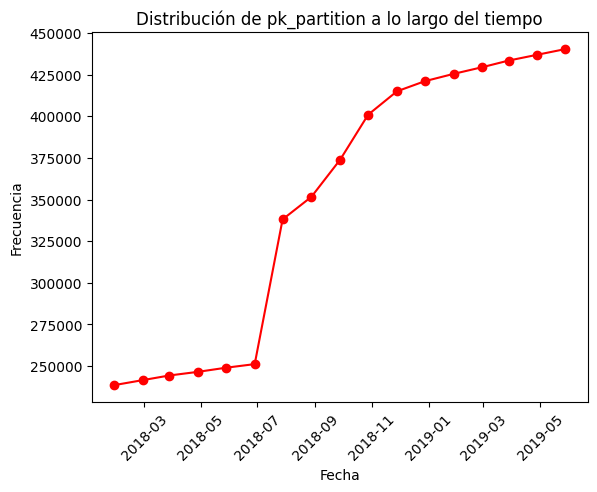

In [39]:
#Esta columna solo nos da informacion del periodo en el que se recogieron los datos. Es interesante ver como la ingesta de datos aumenta con el paso del tiempo y hay un especial repunte en Julio/2018


# Creamos una grafica con los valores
plt.plot(df_ca["pk_partition"].value_counts().index, df_ca["pk_partition"].value_counts().values, marker='o', linestyle='-', color='r')

# Añadismos etiquetas y título y la mostramos
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.title('Distribución de pk_partition a lo largo del tiempo')
plt.xticks(rotation=45)


plt.show()


In [40]:
#Columna entry_date
df_ca["entry_date"].value_counts()

entry_date
2017-07-28    57389
2017-10-03    54287
2017-08-04    45746
2016-10-14    40776
2016-08-03    33414
              ...  
2016-11-01       11
2017-03-16       11
2015-08-19       11
2018-05-31        9
2017-05-01        7
Name: count, Length: 1495, dtype: int64

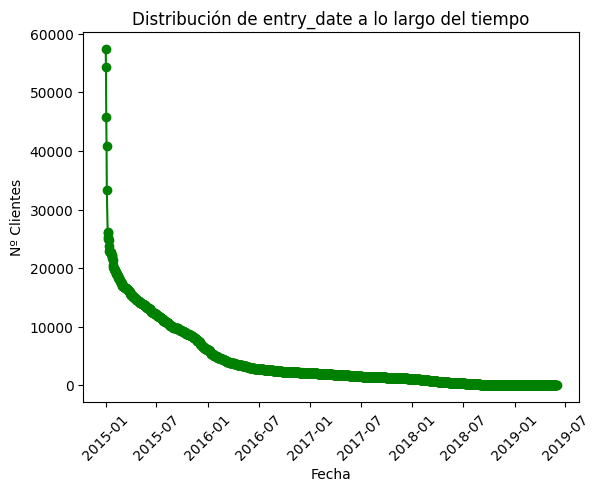

In [41]:
#Esta columna nos da informacion de la fecha en que la que se hizo la primera contratación. Vamos a dibujarla para obtener las información


# Creamos una grafica con los valores
plt.plot(df_ca["entry_date"].value_counts().sort_index().index, df_ca["entry_date"].value_counts().values, marker='o', linestyle='-', color='g')

# Añadismos etiquetas y título y la mostramos
plt.xlabel('Fecha')
plt.ylabel('Nº Clientes')
plt.title('Distribución de entry_date a lo largo del tiempo')
plt.xticks(rotation=45)


plt.show()

In [42]:
#La contratación de nuevos clientes ha seguidos una constante descente a lo largo del tiempo.
#Podemos ver cuantos clientes nuevos ha habido en el mes de Mayo de 2019

len(df_ca[(df_ca["entry_date"] >= "2019-05-01")])

#Por tanto en el mes de Mayo de 2019, hubo 4380 nuevos clientes.

4380

In [43]:
df_ca[(df_ca["entry_date"] >= "2019-05-01")]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,cliente_habitual
5498514,657817,2019-05-28,2019-05-12,KAT,0.0,03 - UNIVERSITARIO,0
5498545,660317,2019-05-28,2019-05-06,KFC,0.0,03 - UNIVERSITARIO,0
5498595,677280,2019-05-28,2019-05-05,KAT,0.0,03 - UNIVERSITARIO,0
5498603,678711,2019-05-28,2019-05-21,KAT,1.0,03 - UNIVERSITARIO,0
5498626,663346,2019-05-28,2019-05-17,KAT,0.0,03 - UNIVERSITARIO,0
...,...,...,...,...,...,...,...
5919497,1190195,2019-05-28,2019-05-22,KAT,0.0,03 - UNIVERSITARIO,0
5923427,1186046,2019-05-28,2019-05-27,KAT,0.0,03 - UNIVERSITARIO,0
5924054,1185013,2019-05-28,2019-05-14,KAT,1.0,03 - UNIVERSITARIO,0
5936700,1164094,2019-05-28,2019-05-13,KFC,1.0,03 - UNIVERSITARIO,0


In [44]:
#Restando el numero de registros del mes de mayo, menos los del mes anterior, podemos ver el total de nuevos registros o "ventas". De todas las 6904 ventas t otales, 4380 fueron a nuevos clientes
len(df_ca[(df_ca["pk_partition"] == "2019-05-28")]) - len(df_ca[(df_ca["pk_partition"] == "2019-03-28")])

6904

In [45]:
#Columna active_customer
df_ca["active_customer"].value_counts()

active_customer
0.0    3548463
1.0    2390520
Name: count, dtype: int64

In [46]:
#En %
df_ca["active_customer"].value_counts(normalize=True) * 100

#Solo el 40% de los clientes son clientes activos en la APP, lo que daría margen a promociones que incluyan el registro en la APP

active_customer
0.0    59.748664
1.0    40.251336
Name: proportion, dtype: float64

In [47]:
### PARA LA TUTORIA ###
# 1- TARGET ?¿  lo tenemos que crear nosotros el target?.
# Entendemos que es una clasificación, ya que el objetivo del analisis es la propresión de compra de los clientes, usamos la columna nueva "cliente habitual" ?¿?¿ 

# 2- DF , ahora mismo tenemos 3 dataset distintos, tenemos que unirlos en uno solo y eliminar las columnas repetidas ¿?¿?¿

